# Análise exploratória de dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

## 1. Descrição dos dados

Conjunto de dados sobre os passageiros do Titanic.

### 1.1 Leitura dos Dados

In [4]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1.2. Dicionário de dados

In [5]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,survived,Indica se o passageiro sobreviveu (1) ou não (0).,qualitativa,nominal
1,pclass,"Classe do bilhete do passageiro (1 = Primeiro,...",qualitativa,ordinal
2,sex,"Sexo do passageiro (male = masculino, female =...",qualitativa,nominal
3,age,Idade do passageiro em anos.,quantitativa,contínua
4,sibsp,Número de irmãos ou cônjuges a bordo.,quantitativa,discreta
5,parch,Número de pais ou filhos a bordo.,quantitativa,discreta
6,fare,Tarifa paga pelo passageiro.,quantitativa,contínua
7,embarked,Porto de embarque do passageiro (C = Cherbourg...,qualitativa,nominal
8,class,"Classe do bilhete do passageiro (First, Second...",qualitativa,ordinal
9,who,"Categoria do passageiro (man = homem, woman = ...",qualitativa,nominal


* 15 variáveis, sendo 9 qualitativas nominais, 2 qualitativas ordinais, 2 quantitativas contínuas e 2 quantitativas discretas

## 2. Perguntas de partida e hipóteses

1. **Qual o impacto do gênero na sobrevivência?**
 - **Hipótese:** Mulheres tiveram uma taxa de sobrevivência maior do que homens, alinhado com a política de "mulheres e crianças primeiro" em situações de emergência.
2. **A idade tem algum efeito sobre a chance de sobrevivência?** 
 - **Hipótese:** Passageiros mais jovens (crianças) e talvez idosos podem ter tido maiores chances de sobrevivência em comparação a adultos, devido a políticas de resgate prioritário.
3. **Qual a taxa de sobrevivência dos passageiros em cada classe e há impacto para sobrevivência?**
 - **Hipótese:** Passageiros da primeira classe tiveram uma taxa de sobrevivência maior do que aqueles das classes inferiores, devido a melhores acessos a botes salva-vidas e localizações mais favoráveis.
4. **O porto de embarque (embarked) influencia a taxa de sobrevivência?**
 - **Hipótese:** Passageiros que embarcaram em Cherbourg têm uma maior taxa de sobrevivência em comparação com os que embarcaram em Southampton e Queenstown.
5. **Passageiros que estavam acompanhados (sibsp e parch) tiveram uma maior chance de sobrevivência?**
 - **Hipótese:** Passageiros que estavam sozinhos têm uma menor taxa de sobrevivência.
6. **Como as diferentes variáveis numéricas e binárias do dataset do Titanic estão relacionadas entre si e com a sobrevivência dos passageiros?**
- **Hipótese:** Variáveis que refletem o status socioeconômico dos passageiros (como pclass e fare) e características demográficas (como age e adult_male) têm correlações significativas com a sobrevivência (survived).


### 2.1 Qual o impacto do gênero na sobrevivência?

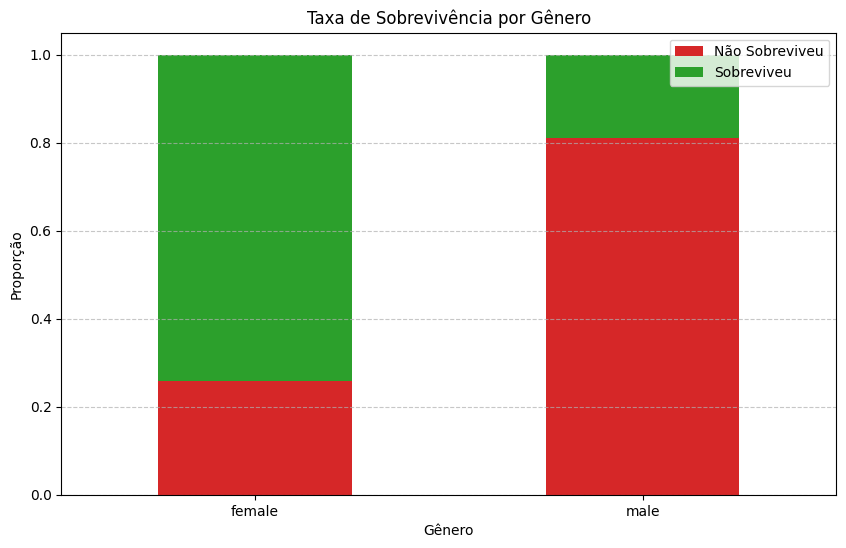

In [8]:
#Contar o número de sobreviventes e não sobreviventes usando o gênero como filtro
gender_survival = df.groupby('sex')['survived'].value_counts(normalize=True).unstack()

#Plotar resultados
gender_survival.plot(kind='bar', stacked=True, color=['#d62728', '#2ca02c'], figsize=(10, 6))
plt.title('Taxa de Sobrevivência por Gênero')
plt.ylabel('Proporção')
plt.xlabel('Gênero')
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()          

### 2.2 A idade tem algum efeito sobre a chance de sobrevivência?

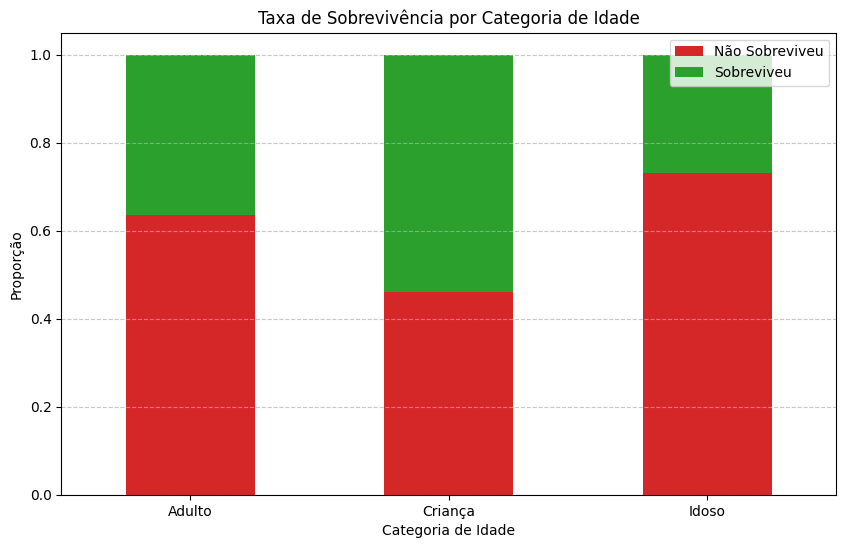

In [12]:
# Categorizar a idade
def categorize_age(age):
    if age < 18:
        return 'Criança'
    elif age >= 60:
        return 'Idoso'
    else:
        return 'Adulto'

df['age_category'] = df['age'].apply(categorize_age)

# Contar o número de sobreviventes e não sobreviventes usando a idade como filtro
age_survival = df.groupby('age_category')['survived'].value_counts(normalize=True).unstack()

# Plotar os resultados
ax = age_survival.plot(kind='bar', stacked=True, color=['#d62728', '#2ca02c'], figsize=(10, 6))
plt.title('Taxa de Sobrevivência por Categoria de Idade')
plt.ylabel('Proporção')
plt.xlabel('Categoria de Idade')
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2.3 Qual a taxa de sobrevivência dos passageiros em cada classe e há impacto para sobrevivência?

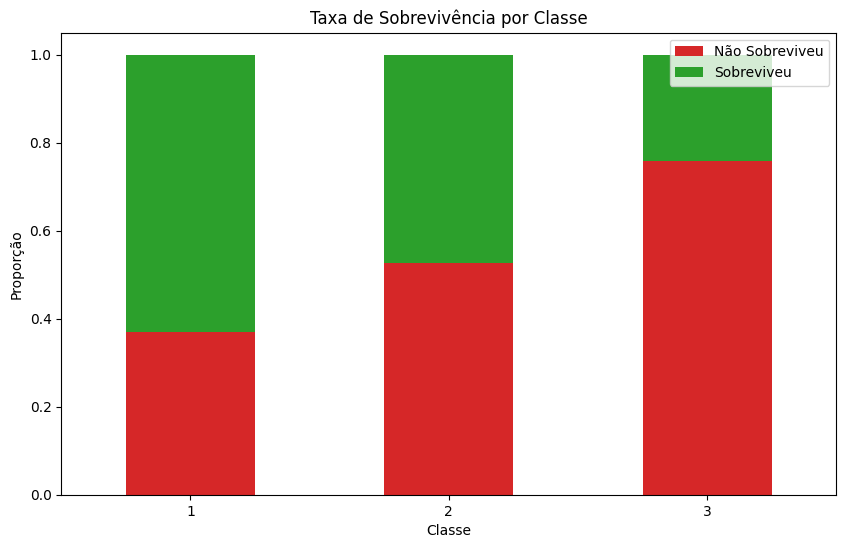

In [58]:
# Contar o número de sobreviventes e não sobreviventes usando a classe como filtro
class_survival = df.groupby('pclass')['survived'].value_counts(normalize=True).unstack()

# Plotar os resultados
survival_by_class.plot(kind='bar',  stacked=True, color=['#d62728', '#2ca02c'], figsize=(10, 6))
plt.title('Taxa de Sobrevivência por Classe')
plt.ylabel('Proporção')
plt.xlabel('Classe')
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right')
plt.xticks(rotation=0)
plt.show()

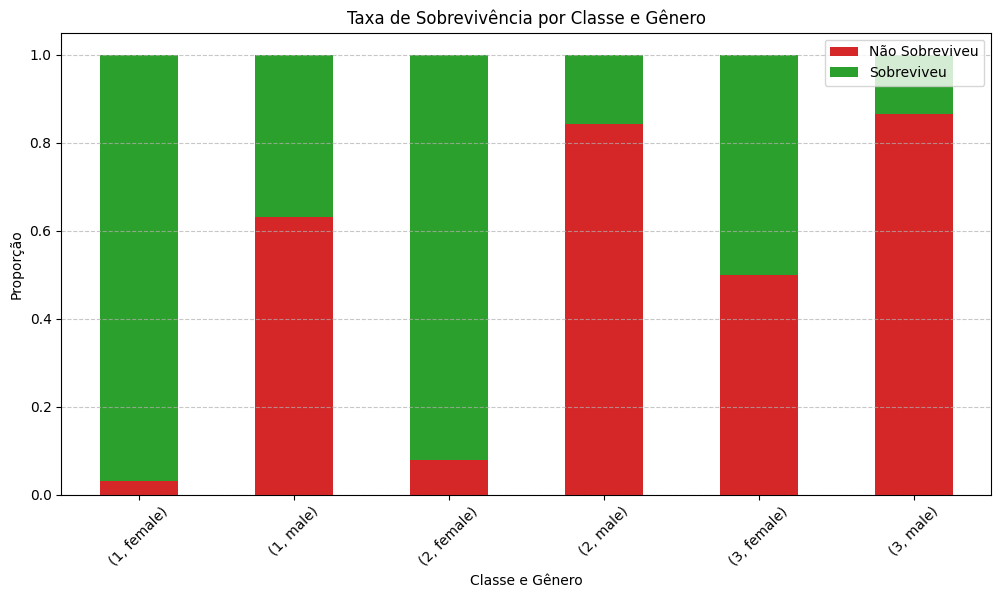

In [7]:
# Contar o número de sobreviventes e não sobreviventes usando classe e gênero como filtro
class_gender_survival = df.groupby(['pclass', 'sex'])['survived'].value_counts(normalize=True).unstack()

# Plotar resultados
class_gender_survival.plot(kind='bar', stacked=True, color=['#d62728', '#2ca02c'], figsize=(12, 6))
plt.title('Taxa de Sobrevivência por Classe e Gênero')
plt.ylabel('Proporção')
plt.xlabel('Classe e Gênero')
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 2.4 O porto de embarque (embarked) influencia a taxa de sobrevivência?

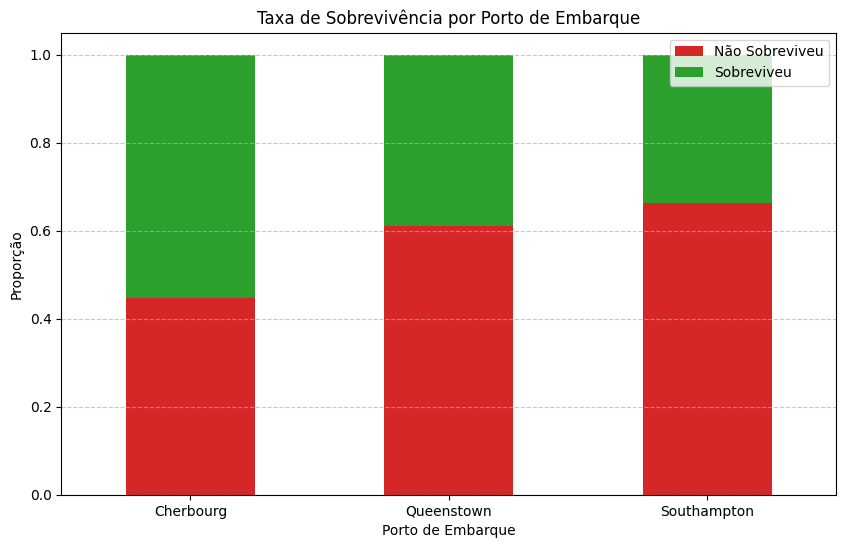

In [23]:
# Contar o número de sobreviventes e não sobreviventes usando o porto de embarque como filtro
embarked_survival = df.groupby('embark_town')['survived'].value_counts(normalize=True).unstack()

# Plotar os resultados
ax = embarked_survival.plot(kind='bar', stacked=True, color=['#d62728', '#2ca02c'], figsize=(10, 6))
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.ylabel('Proporção')
plt.xlabel('Porto de Embarque')
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2.5 Passageiros que estavam acompanhados (sibsp e parch) tiveram uma maior chance de sobrevivência?

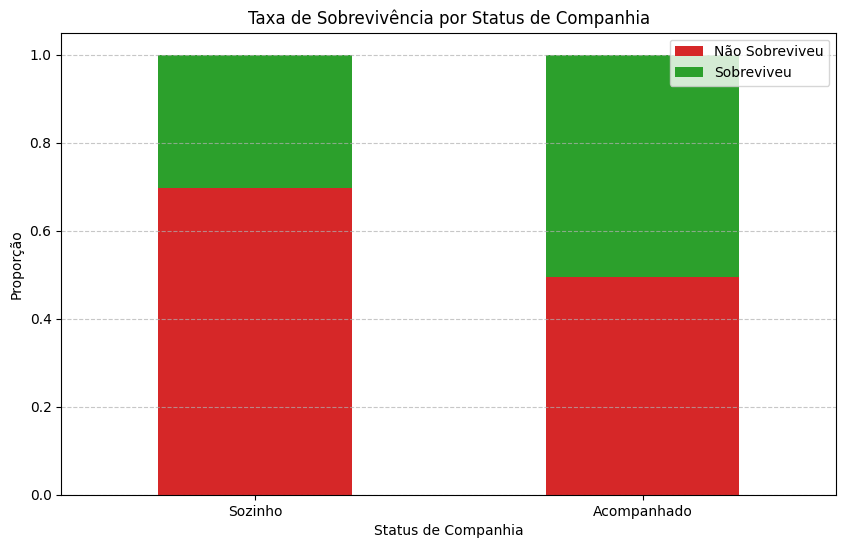

In [60]:
# Criar uma nova coluna que indica se o passageiro estava acompanhado
df['accompanied'] = (df['sibsp'] > 0) | (df['parch'] > 0)
df['accompanied'] = df['accompanied'].astype(int)  # 1 (acompanhado) e 0 (sozinho)

# Contar o número de sobreviventes e não sobreviventes usando status de companhia como filtro
accompanied_survival = df.groupby('accompanied')['survived'].value_counts(normalize=True).unstack()

# Plotar os resultados
ax = accompanied_survival.plot(kind='bar', stacked=True, color=['#d62728', '#2ca02c'], figsize=(10, 6))
plt.title('Taxa de Sobrevivência por Status de Companhia')
plt.ylabel('Proporção')
plt.xlabel('Status de Companhia')
plt.xticks(ticks=[0, 1], labels=['Sozinho', 'Acompanhado'], rotation=0)
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2.6 Como as diferentes variáveis estão relacionadas entre si e com a sobrevivência dos passageiros?

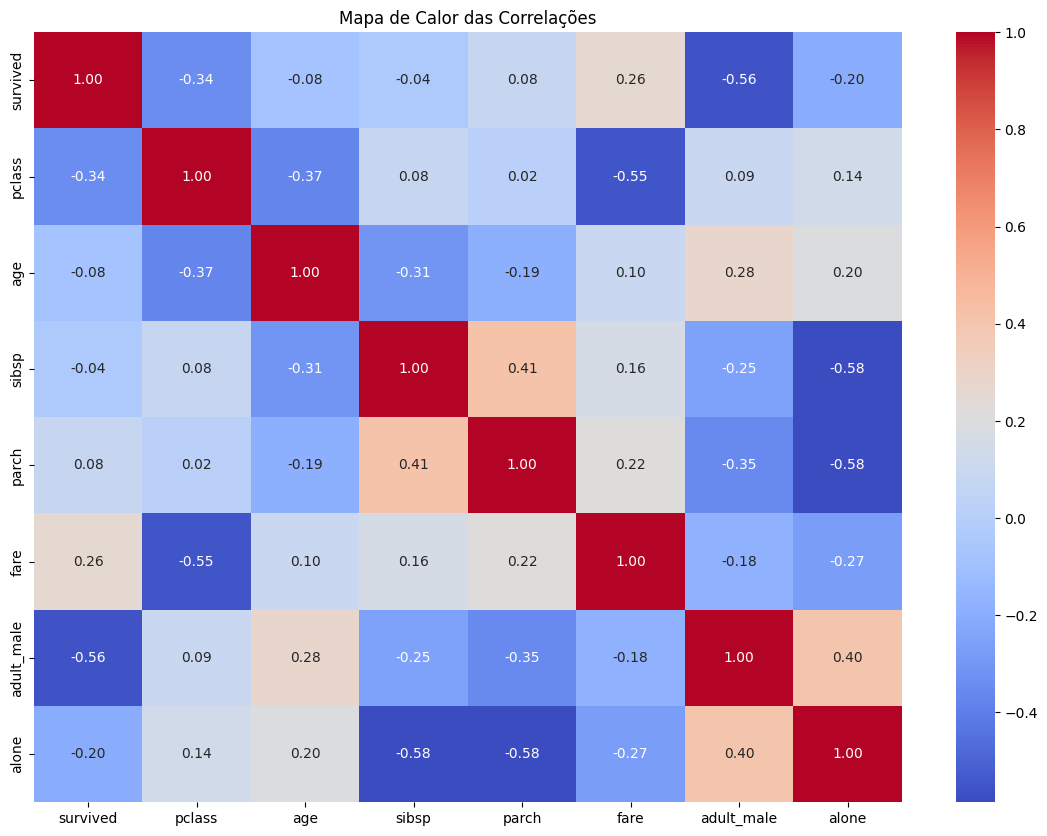

In [10]:
# Calcular correlações, considerando apenas colunas numéricas
correlation_matrix = df.corr(numeric_only=True)

# Plotar mapa de calor de correlações
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações')
plt.show()

 - A variável survived tem uma correlação negativa com pclass (-0.34) e adult_male (-0.56). Isso indica que passageiros de classe mais baixa e homens adultos tinham menores chances de sobrevivência.
 - A correlação da survived com fare (0.26) é positiva, sugerindo que passageiros que pagaram tarifas mais altas tinham maiores chances de sobreviver.

## 3. Insights

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

- Há uma disparidade significativa na taxa de sobrevivência entre homens e mulheres. A política de salvamento e outras variáveis podem ter contribuído para essa desigualdade.

- Crianças têm uma chance maior de sobreviver do que adultos e idosos, o que sugere uma prioridade durante o resgate e indica a existência de uma política de resgate.

- É evidente que a classe social influenciou significativamente as chances de sobrevivência no Titanic. Passageiros de primeira classe, por exemplo, geralmente ocupavam cabines em decks superiores, próximas aos botes salva-vidas, e tinham acesso prioritário a recursos como coletes e instruções, aumentando suas chances de resgate.

-  Pessoas que embarcaram em Cherbourg tiveram a maior taxa de sobrevivência.

- Passageiros acompanhados apresentaram maior taxa de sobrevivência, possivelmente devido à ajuda mútua durante a evacuação e à priorização de famílias com crianças.
